Una imagen digital típica se obtiene apilando matrices de píxeles rojos, azules y verdes de intensidades comprendidas entre 0 y 255.

<img src="img/RGB.png">

Una imagen en escala de grises no contiene color, sino sólo tonos de gris. La intensidad de los píxeles de una imagen en escala de grises varía del negro (intensidad 0) al blanco (intensidad total 255), lo que la convierte en lo que solemos llamar una imagen en blanco y negro.

Digits dataset es un conjunto de datos de imágenes en escala de grises de dígitos manuscritos que contiene 1797 imágenes de 8×8.

In [1]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
 
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [2]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

El módulo sklearn.datasets agiliza la importación de datos de dígitos importando de él la clase load_digits. La forma de los datos de dígitos es (1797, 64). Los píxeles de 8×8 se aplanan para crear un vector de longitud 64 para cada imagen.

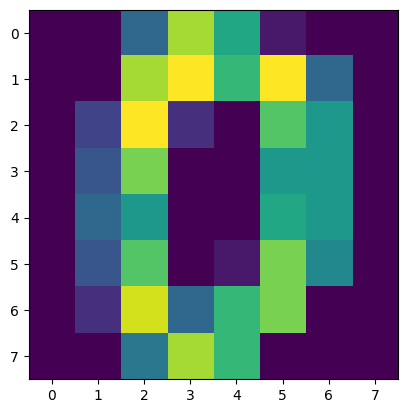

In [4]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample);

Ahora, utilizando PCA, reduzcamos las dimensiones de la imagen de 64 a sólo 2 para poder visualizar el conjunto de datos utilizando un gráfico de dispersión.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(2)
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 2)

También podemos pasar un valor flotante menor que 1 en lugar de un número entero. Por ejemplo, PCA(0.90) significa que el algoritmo encontrará los componentes principales que explican el 90% de la varianza de los datos.

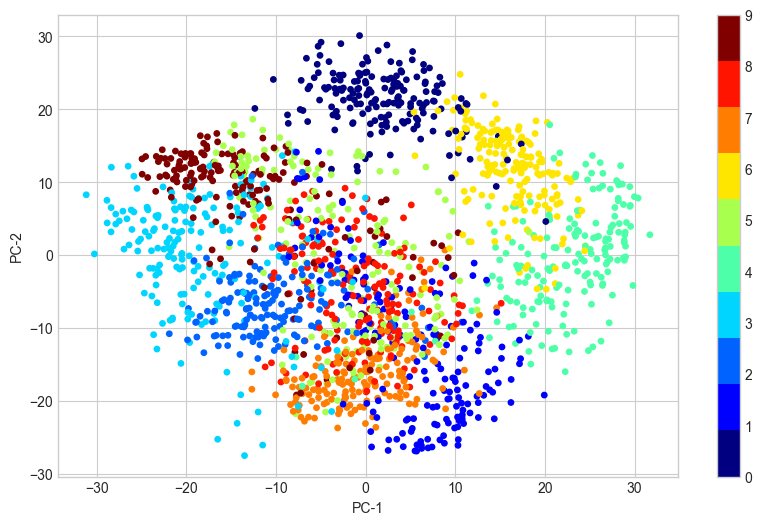

In [6]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show();

Otra aplicación interesante del PCA es la compresión de imágenes. Echemos un vistazo a cómo podemos lograr esto con python.

In [7]:
#!pip install opencv-python

#librería para procesamiento de imágenes

     --------------------------------------- 38.2/38.2 MB 40.9 MB/s eta 0:00:00


In [8]:
# Importing required libraries
import cv2
import numpy as np
from sklearn.decomposition import PCA

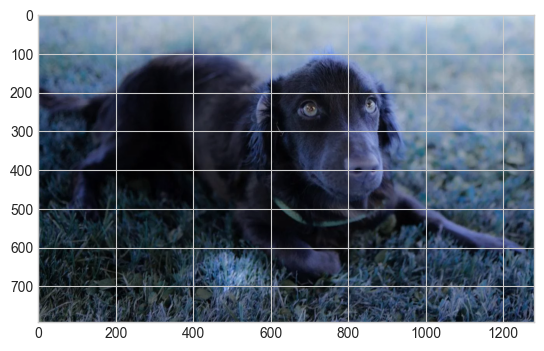

In [9]:
# Loading the image 
img = cv2.imread('img/my_doggo_sample.jpeg')
plt.imshow(img);

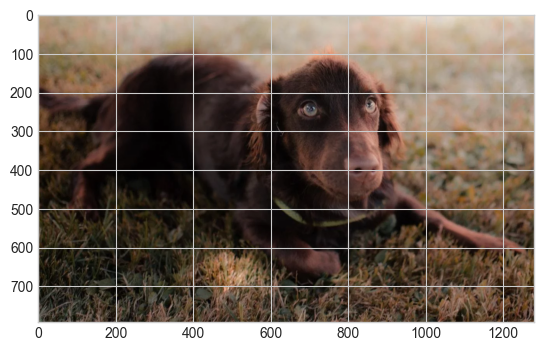

In [10]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image);

In [11]:
img.shape

(793, 1280, 3)

In [12]:
img.size

3045120

In [13]:
793*1280

1015040

In [14]:
img

array([[[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [192, 216, 246],
        [193, 217, 248],
        [193, 217, 248]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [191, 215, 245],
        [192, 216, 246],
        [192, 216, 246]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [189, 213, 243],
        [190, 214, 244],
        [190, 214, 244]],

       ...,

       [[ 47,  63,  76],
        [ 30,  45,  56],
        [ 47,  63,  69],
        ...,
        [ 26,  51,  77],
        [ 29,  55,  79],
        [ 50,  76, 100]],

       [[ 46,  62,  75],
        [ 18,  35,  46],
        [ 29,  45,  52],
        ...,
        [ 40,  67,  95],
        [ 40,  68,  93],
        [ 48,  77, 100]],

       [[ 32,  48,  61],
        [ 17,  34,  45],
        [ 20,  36,  42],
        ...,
        [ 47,  74, 102],
        [ 43,  73,  98],
        [ 48,  79, 103]]

In [15]:
# Splitting the image in R,G,B arrays.
blue, green, red = cv2.split(img)

#it will split the original image into Blue, Green and Red arrays.

In [16]:
blue.shape

(793, 1280)

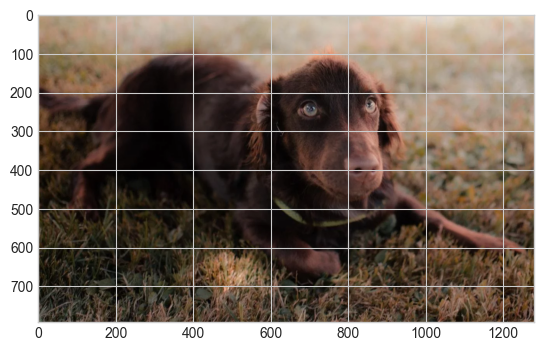

In [17]:
img_not_compressed = cv2.merge([red,green,blue])
#viewing the not compressed image
plt.imshow(img_not_compressed);

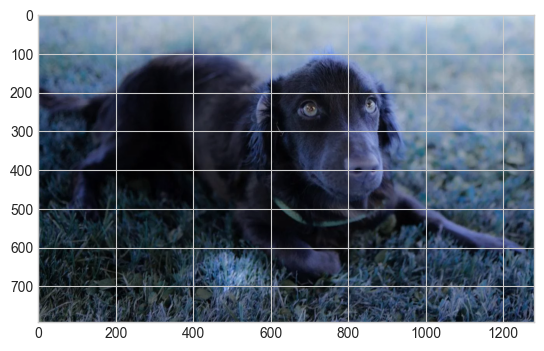

In [18]:
img_not_compressed = cv2.merge([blue, green, red])
#viewing the not compressed image
plt.imshow(img_not_compressed);

OpenCV dividirá en canales Azul, Verde y Rojo en lugar de Rojo, Azul y Verde. Tenga mucho cuidado con la secuencia aquí.

In [19]:
# Initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (793, 20)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 20)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 20)
blue_inverted.shape: (793, 1280)


En el proceso de reconstrucción de las dimensiones originales a partir de las dimensiones reducidas, se pierde algo de información, ya que sólo conservamos los componentes principales seleccionados, 20 en este caso.

In [20]:
img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

Apilando las matrices invertidas usando la función dstack. Aquí es importante especificar el tipo de datos de nuestras matrices, ya que la mayoría de las imágenes son de 8 bits. Cada píxel está representado por un byte de 8 bits.

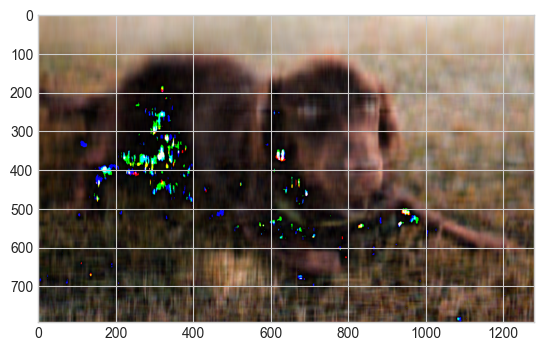

In [21]:
#viewing the compressed image
plt.imshow(img_compressed);

El resultado anterior es el que obtenemos cuando consideramos sólo 20 componentes principales.

Si aumentamos el número de componentes principales, la imagen de salida será más clara.

1) ¡Ahora comprueba con cuántos componentes principales tus ojos no ven la diferencia con el original!

2) El perro no debería ser tan azul, ¡arréglalo!

red_transformed.shape: (793, 100)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 100)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 100)
blue_inverted.shape: (793, 1280)


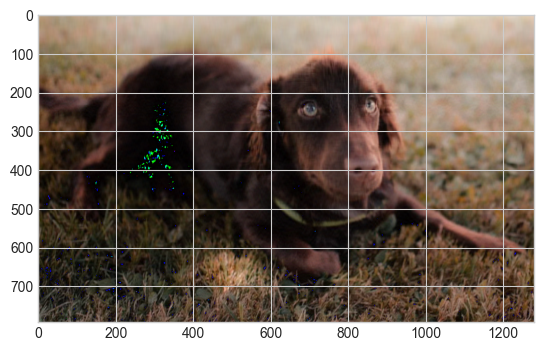

In [22]:
# Initialize PCA with first 20 principal components
pca = PCA(100)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

#viewing the compressed image
plt.imshow(img_compressed);